<a href="https://colab.research.google.com/github/Ghost9892/DAV-pratical-/blob/main/Maths_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical no 6


One way Anova


In [ ]:
import numpy as np
#sample data: test scores for three different methods
method1 = np.array([85,88,92,94,90])
method2 = np.array([78,80,83,77,79])
method3 = np.array([91,89,94,96,92])

In [ ]:
from scipy import stats
#perform one way Anova
f_stats,p_value = stats.f_oneway(method1,method2,method3)
print('f-statistics:',f_stats)
print('p-value:',p_value)

f-statistics: 28.620967741935456
p-value: 2.7093947341694992e-05


In [ ]:
import pandas as pd
data = pd.DataFrame({

    'Score': [85, 78, 91, 88, 80, 89, 92, 83, 94, 94, 77, 96, 90, 79, 92],

    'Method': ['Method1', 'Method1', 'Method1', 'Method2', 'Method2', 'Method2', 'Method3', 'Method3', 'Method3',

               'Method1', 'Method2', 'Method3', 'Method1', 'Method2', 'Method3'],

    'Gender': ['Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',

               'Male', 'Male', 'Male', 'Female', 'Female', 'Female']

})


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Score ~C(Method) * C(Gender)',data=data).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
print(anova_table)

                         sum_sq   df         F    PR(>F)
C(Method)            283.438889  2.0  4.495066  0.044303
C(Gender)             88.816667  1.0  2.817093  0.127574
C(Method):C(Gender)    5.033333  2.0  0.079824  0.923925
Residual             283.750000  9.0       NaN       NaN


Practical 7
not for practical

1.Sign Rank test

In [ ]:
import numpy as py
from scipy.stats import binom

In [ ]:
data=[
    (4,3),
    (5,6),
    (7,6),
    (4,5),
    (3,2),
    (6,6),
    (8,7),
    (5,4),
    (6,6),
    (4,4),
]
data

[(4, 3),
 (5, 6),
 (7, 6),
 (4, 5),
 (3, 2),
 (6, 6),
 (8, 7),
 (5, 4),
 (6, 6),
 (4, 4)]

In [ ]:
differenxes = [x - y for x,y in data]
positive_differences = sum(1 for differenxes in differenxes if differenxes > 0)
negative_differences = sum(1 for differenxes in differenxes if differenxes < 0)
n=len(data)
k=(positive_differences)
print(k)
print(n)

5
10


In [ ]:
p_value = binom.cdf(k,n,0.5) + binom.cdf(-k,n,0.5)
print("p_value:",p_value)

p_value: 0.623046875


2.Wilcoxon signed rank test


In [ ]:
import numpy as np
from scipy.stats import wilcoxon

before = [34,42,38,46,33,29,42,37,40,42]
after = [30,40,36,44,28,24,41,35,38,20]

In [ ]:
differenxes = [after[i]-before[i] for i in range(len(before))]
statistic,p_value = wilcoxon(differenxes)
print("statistic:",statistic)
print("p_value:",p_value)

statistic: 0.0
p_value: 0.001953125


3.kruskal wali's test


In [ ]:
import scipy.stats as stats
group_A = [23,27,21,19,25]
group_B = [18,16,20,24,22]
group_c = [10,13,15,11,12]

H,p_value = stats.kruskal(group_A,group_B,group_c)
print("kruskal wali H:",H)
print("p_value:",p_value)

kruskal wali H: 10.220000000000006
p_value: 0.006036082923599548


4.Mann Whitney U test

In [ ]:
from scipy import stats
#sample data
sample1 = [23,45,67,68,89,12,34,56]
sample2 = [13,25,37,49,61,73,85]
#perform test
U_statistic,p_value = stats.mannwhitneyu(sample1,sample2,alternative='two-sided')
print("U_statistic:",U_statistic)
print("p_value:",p_value)
#interpret the values
alpha = 0.05 #significant value
if p_value < alpha:
    print("the difference between the two sample is statistically significant")
else:
    print("the difference between the two sample is not statistically significant")

U_statistic: 27.0
p_value: 0.9550893550893552
the difference between the two sample is not statistically significant


Practical no 4


t-test


In [ ]:
import numpy as np
from scipy import stats

#sample data
group1 = np.array([85,90,88,92,95])
group2 = np.array([78,80,84,83,82])

#perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(group1,group2)
print(f"t-statistic:,{t_stat}")
print(f"p-value:,{p_value}")

#interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: there is a significant difference between the two groups ")
else:
    print(" fail to Reject the null hypothesis: there is a no significant difference between the two groups ")


t-statistic:,4.268108336074997
p-value:,0.002731175755558608
Reject the null hypothesis: there is a significant difference between the two groups 


z-test


In [ ]:
import numpy as np
from scipy import stats

#sample data
sample_heights = np.array([66,68,70,65,69])
population_mean= 67
population_std= 2 # known population stansard deviation

#calculate the sample mean
sample_mean = np.mean(sample_heights)

#perform one sample x-test
z_stat = +(sample_mean - population_mean) / (population_std / np.sqrt(len(sample_heights)))
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat))) #two-tailed test

print(f"z-statistic:,{z_stat}")
print(f"p-value:,{p_value}")

#interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the sample mean is significantly different from the population mean")
else:
    print("fail to Reject the null hypothesis: the sample mean is not significantly different from the population mean")

z-statistic:,0.6708203932499306
p-value:,0.502334954360506
fail to Reject the null hypothesis: the sample mean is not significantly different from the population mean


Practical no:9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Generate the data


In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([7,14,15,18,19])
n = np.size(x)

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean

(np.float64(3.0), np.float64(14.6))

In [ ]:
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)- n*x_mean*x_mean

In [ ]:
b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean
print('slope b1 is', b1)
print('intercepy b0 is ', b0)

slope b1 is 2.8
intercepy b0 is  6.200000000000001


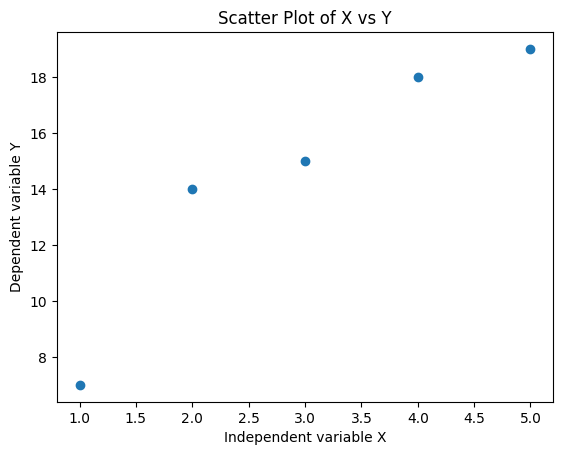

In [ ]:
plt.scatter(x,y)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable Y')
plt.title('Scatter Plot of X vs Y')
plt.show()

Plot the given datapoints and fit the regression line

Text(0, 0.5, 'Y')

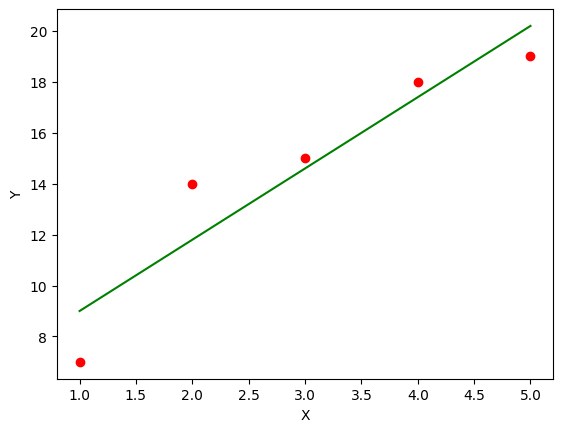

In [ ]:
y_pred = b1 * x + b0
plt.scatter(x,y,color = 'red')
plt.plot(x,y_pred,color='green')
plt.xlabel('X')
plt.ylabel('Y')

Practical No:8


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('AAPL.csv',parse_dates=True,index_col="Date")

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [ ]:
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100323   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095089   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088110   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090291   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092908   
...                ...         ...         ...         ...         ...   
2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
2022-03-24  171.059998  174.139999  170.210007  174.070007  174.070007   

               Volume  
Date         

<Axes: xlabel='Date'>

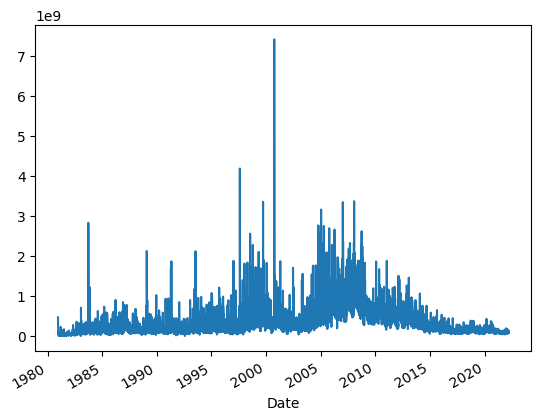

In [ ]:
df['Volume'].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

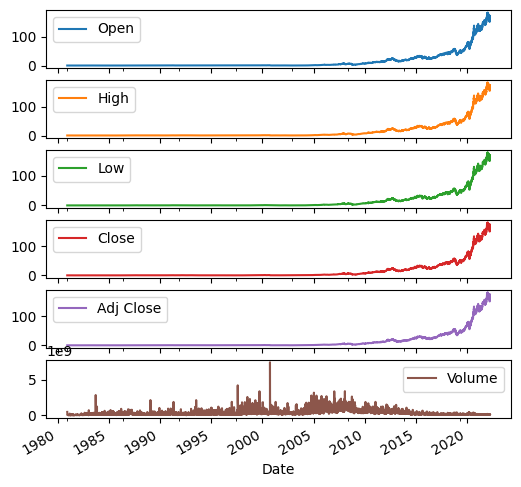

In [ ]:
df.plot(subplots=True,figsize=(6,6))

/tmp/ipython-input-2440660320.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.resample('M').mean()


<BarContainer object of 27 artists>

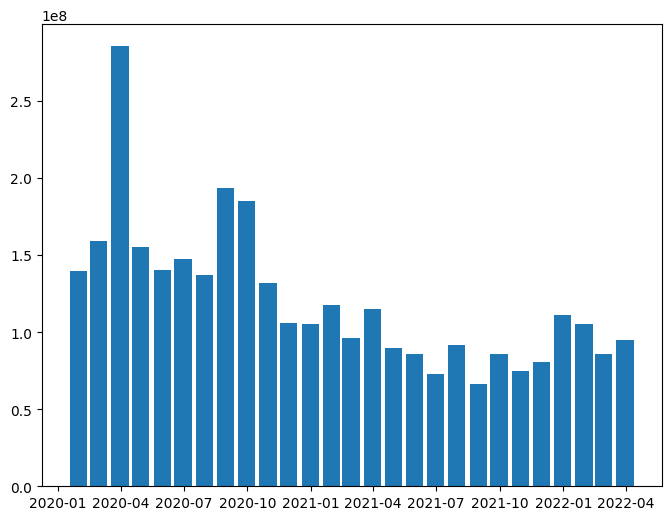

In [ ]:
#Resampling the tie series data based on month 'M' frequency
df_month = df.resample('M').mean()
#using subplot
fig, ax = plt.subplots(figsize=(8,6))
#plotting bar graph
ax.bar(df_month['2020':].index,df_month.loc['2020':,'Volume'],width=25,align='center')


Practical no:3


Normal Distribution


1.Suppose there are 100 students in the class and in one of the mathematics tests the average marks scored by the students in the subject is 78 and the standard deviation is 25. The marks of the student follow Normal probability distribution.
find:(i) percentage of student who got less than 60 marks
(ii) percentage of student who have scored more than 70



In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#Given information
mean = 78
std_dev = 25
total_students = 100
score = 60
#calculate z-score for 60
z_score = (score - mean) / std_dev
#Calculate the probablity of gettibg a score less than 60
prob = norm.cdf(z_score)
#calculate the percentage of students who get less than 60 marks
percentage = prob * 100
#print the result
print("The percentage of students who scored less than 60 is:" , round(percentage,2),"%")

The percentage of students who scored less than 60 is: 23.58 %


In [ ]:
#Given information
mean = 78
std_dev = 25
total_students = 100
score = 70
#calculate z-score for 60
z_score = (score - mean) / std_dev
#Calculate the probablity of gettibg a score less than 60
prob = norm.cdf(z_score)
#calculate the percentage of students who get less than 60 marks
percentage =(1- prob) * 100
#print the result
print("The percentage of students who scored more than 60 is:" , round(percentage,2),"%")

The percentage of students who scored more than 60 is: 62.55 %


2.Binomial Distribution


In [ ]:
from scipy.stats import binom

In [ ]:
#setting the values
# of n of p
n=6
p=0.6

In [ ]:
#defining the list of r values
r_values = list(range(n+1))
#list of pmf values
dist = [binom.pmf(r,n,p) for r in r_values]
print(dist)

[np.float64(0.004096000000000003), np.float64(0.03686400000000002), np.float64(0.1382400000000001), np.float64(0.2764800000000001), np.float64(0.3110400000000001), np.float64(0.1866240000000001), np.float64(0.04665599999999999)]


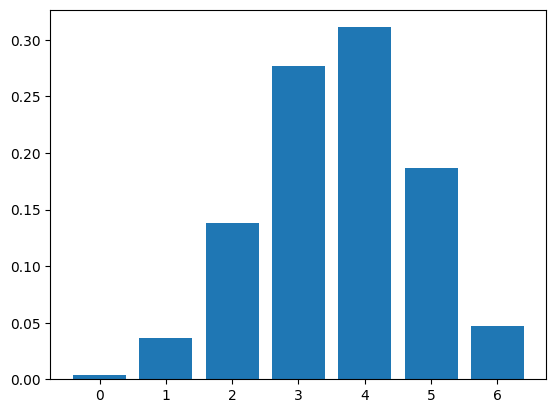

In [ ]:
#plotting the graph
plt.bar(r_values, dist)
plt.show()

# question:
Fashion Bazaar (FB) is an e-commerce company that sells kids apparel.
It is observed that 15% of their customers return the items purchased by them for many reasons
(such as size, color, and material mismatch). On a specific day, 30 customers purchased items from FB.
Calculate the probability that exactly 5 customers will return the items.


In [ ]:
#Expected number of succesful trails = 5
#total number of trials = 30
#the probablity of success = 0.15

In [ ]:
stats.binom.pmf(5,30,0.15)

np.float64(0.18610694845752918)

3.poisson


1.The number of calls arriving at a call center follows a Poisson distribution at 20 calls per hour. #Calculate the probability that the number of calls will be maximum 10.

In [ ]:
stats.poisson.cdf(10,20)

np.float64(0.010811718826652723)

In [ ]:
from scipy.stats import chi2

# Parameters for the Chi-Square distribution
degrees_of_freedom = 5  # Degrees of freedom

# Generate a range of x values
x = np.linspace(0, 20, 1000)


# Calculate the probability density function (PDF) for the Chi-Square distribution
pdf = chi2.pdf(x, degrees_of_freedom)


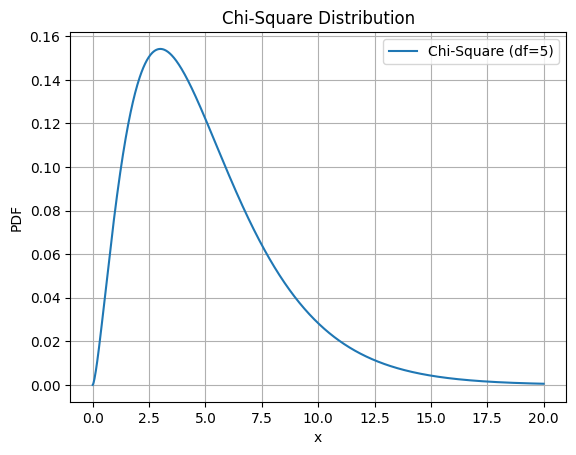

In [ ]:
# Plot the PDF
plt.plot(x, pdf, label=f'Chi-Square (df={degrees_of_freedom})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('Chi-Square Distribution')
plt.grid()
plt.show()

Practical No:2
not for practical

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Assuming the dataset in the csv format
df = pd.read_csv('sales_data - sales_data.csv')

/tmp/ipython-input-2816381321.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales_data - sales_data.csv')


In [ ]:
print(df.head())

         Date Day     Month  Year  Customer_Age       Age_Group  \
0  26-11-2013  26  November  2013            19     Youth (<25)   
1  26-11-2015  26  November  2015            19     Youth (<25)   
2  23-03-2014  23     March  2014            49  Adults (35-64)   
3  23-03-2016  23     March  2016            49  Adults (35-64)   
4  15-05-2014  15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost  \
0  Hitch Rack - 4-Bike             

In [ ]:
print(df.describe())

                Year   Customer_Age  Order_Quantity      Unit_Cost  \
count  120738.000000  120738.000000   120737.000000  120737.000000   
mean     2014.395733      35.953279       12.099829     251.076513   
std         5.896903      11.034272        9.534304     535.628229   
min        13.000000      17.000000        1.000000       1.000000   
25%      2013.000000      28.000000        2.000000       2.000000   
50%      2014.000000      35.000000       11.000000      11.000000   
75%      2016.000000      43.000000       20.000000      38.000000   
max      2016.000000      87.000000       32.000000    2171.000000   

          Unit_Price         Profit           Cost        Revenue  
count  120737.000000  120737.000000  120737.000000  120737.000000  
mean      426.280950     284.922277     451.828859     736.751137  
std       898.006695     441.236505     859.264395    1270.397178  
min         2.000000     -30.000000       1.000000       2.000000  
25%         5.000000      32.

In [ ]:
#check for any missing valie
print(df.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               1
Product_Category    1
Sub_Category        1
Product             1
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
dtype: int64


Data Visualization


1.Visualizing Sales over time

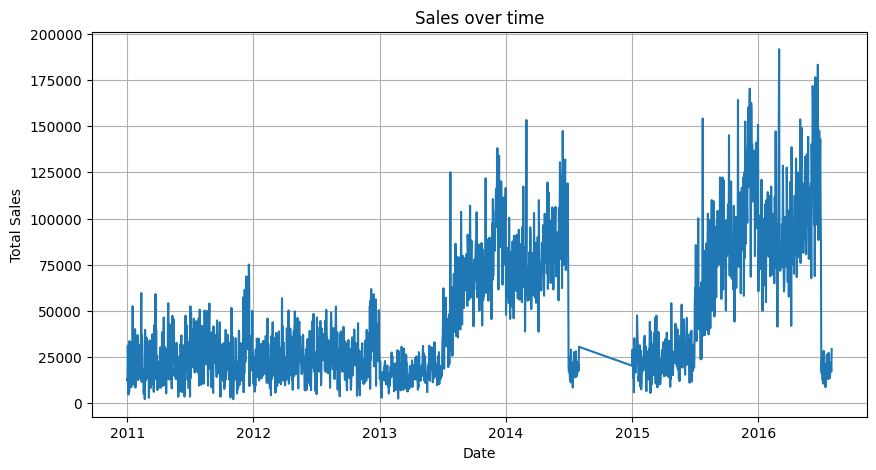

In [ ]:
# Convert 'Date' column to datetime type, coercing errors to NaT
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows where 'Date' conversion failed
df = df.dropna(subset=['Date'])

# Group by date and calculate total sales per day
daily_sales = df.groupby('Date')['Revenue'].sum()

# Plot the sales trend over time
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


2.Visualizing sales by product Category

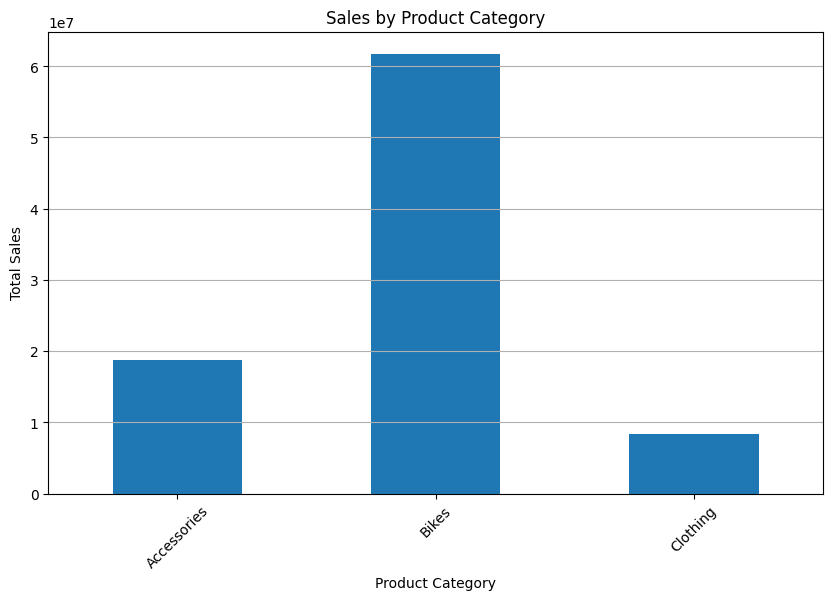

In [ ]:
#Group by product category and calculate total sales per group
category_sales = df.groupby('Product_Category')['Revenue'].sum()
#plot a bar chart to show sales by product category
plt.figure(figsize=(10,6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

3.Visualizing sales distribution

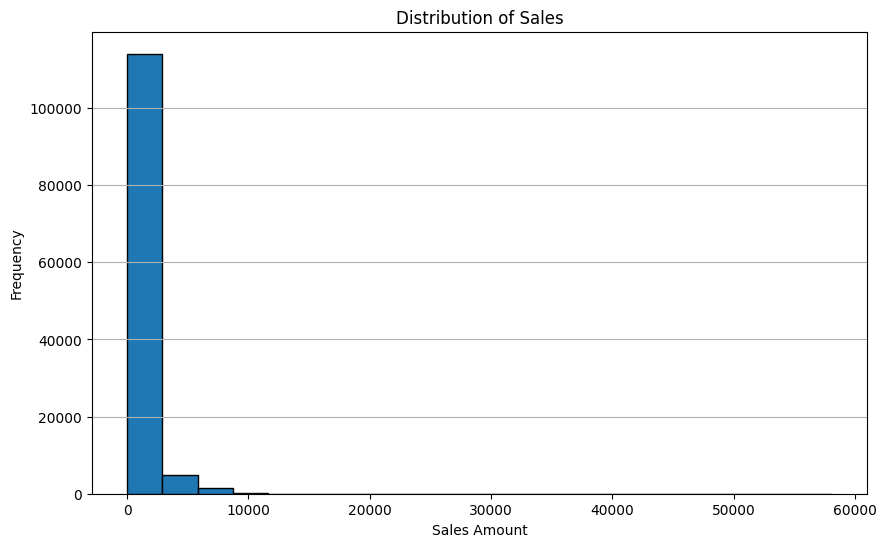

In [ ]:
#plot a histogram to show the distribution of sales amount
plt.figure(figsize=(10,6))
plt.hist(df['Revenue'],bins=20,edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Practical No: 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Assuming the dataset in the csv format
df = pd.read_csv('sales_data - sales_data.csv')
print(df.head())

         Date Day     Month  Year  Customer_Age       Age_Group  \
0  26-11-2013  26  November  2013            19     Youth (<25)   
1  26-11-2015  26  November  2015            19     Youth (<25)   
2  23-03-2014  23     March  2014            49  Adults (35-64)   
3  23-03-2016  23     March  2016            49  Adults (35-64)   
4  15-05-2014  15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost  \
0  Hitch Rack - 4-Bike             

/tmp/ipython-input-2843619461.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales_data - sales_data.csv')


In [ ]:
#df.info()
df.iloc[:,5:12].nunique()

,0
Age_Group,5
Customer_Gender,3
Country,7
State,53
Product_Category,3
Sub_Category,17
Product,130


In [ ]:
df.describe()

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,120738.000000,120738.000000,120737.000000,120737.000000,120737.000000,120737.000000,120737.000000,120737.000000
mean,2014.395733,35.953279,12.099829,251.076513,426.280950,284.922277,451.828859,736.751137
std,5.896903,11.034272,9.534304,535.628229,898.006695,441.236505,859.264395,1270.397178
min,13.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013.000000,28.000000,2.000000,2.000000,5.000000,32.000000,29.000000,69.000000
50%,2014.000000,35.000000,11.000000,11.000000,30.000000,117.000000,119.000000,247.000000
75%,2016.000000,43.000000,20.000000,38.000000,55.000000,366.000000,390.000000,775.000000
max,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
category_counts = df['Country'].value_counts()
print(category_counts)

Country
United States     41598
Australia         25346
Canada            15319
United Kingdom    14780
Germany           11958
France            11736
936                   1
Name: count, dtype: int64


Text(0.5, 1.0, 'Categorical Data distribution')

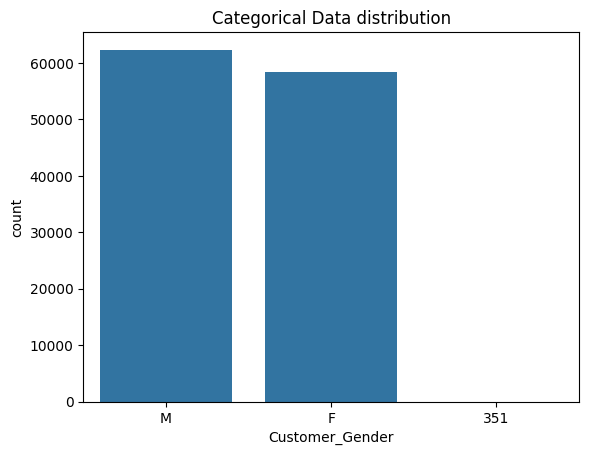

In [ ]:
sns.countplot(data=df,x='Customer_Gender')
plt.title("Categorical Data distribution")


/tmp/ipython-input-1131781314.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


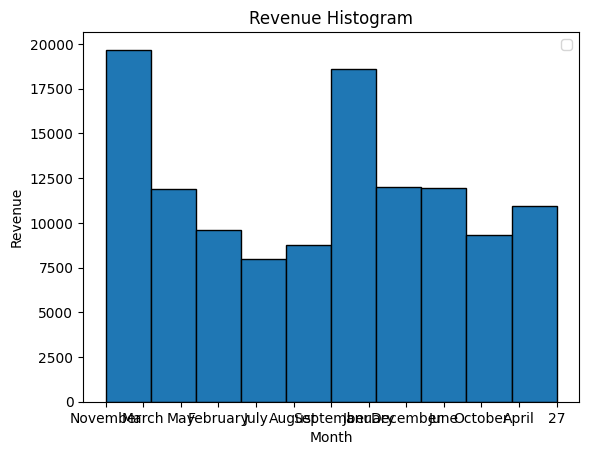

In [ ]:
plt.hist(df['Month'],bins=10, edgecolor='black')
plt.title('Revenue Histogram')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()

One Hot Encoding


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns=['Country'])
one_hot_encoded_data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,State,Product_Category,Sub_Category,...,Profit,Cost,Revenue,Country_936,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States
0,26-11-2013,26,November,2013,19,Youth (<25),M,British Columbia,Accessories,Bike Racks,...,590.0,360.0,950.0,False,False,True,False,False,False,False
1,26-11-2015,26,November,2015,19,Youth (<25),M,British Columbia,Accessories,Bike Racks,...,590.0,360.0,950.0,False,False,True,False,False,False,False
2,23-03-2014,23,March,2014,49,Adults (35-64),M,New South Wales,Accessories,Bike Racks,...,1366.0,1035.0,2401.0,False,True,False,False,False,False,False
3,23-03-2016,23,March,2016,49,Adults (35-64),M,New South Wales,Accessories,Bike Racks,...,1188.0,900.0,2088.0,False,True,False,False,False,False,False
4,15-05-2014,15,May,2014,47,Adults (35-64),F,New South Wales,Accessories,Bike Racks,...,238.0,180.0,418.0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120733,12-04-2016,12,April,2016,41,Adults (35-64),M,England,Clothing,Vests,...,112.0,72.0,184.0,False,False,False,False,False,True,False
120734,02-04-2014,2,April,2014,18,Youth (<25),M,Queensland,Clothing,Vests,...,655.0,528.0,1183.0,False,True,False,False,False,False,False
120735,02-04-2016,2,April,2016,18,Youth (<25),M,Queensland,Clothing,Vests,...,655.0,528.0,1183.0,False,True,False,False,False,False,False
120736,04-03-2014,4,March,2014,37,Adults (35-64),F,Seine (Paris),Clothing,Vests,...,684.0,576.0,1260.0,False,False,False,True,False,False,False


Practical No: 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
risk = pd.read_csv('risk_analytics_train - risk_analytics_train.csv')

In [ ]:
risk.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
risk.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,float64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
risk.shape

(614, 13)

In [ ]:
risk.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
risk.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
risk.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


Importing Categorical data with the mode Values

In [ ]:
for x in ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term']:
    risk[x].fillna(risk[x].mode()[0],inplace=True)

/tmp/ipython-input-3500288893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risk[x].fillna(risk[x].mode()[0],inplace=True)


Importing Categorical data with the mean Values

In [ ]:
risk['LoanAmount'].fillna(round(risk['LoanAmount'].mean(),0),inplace=True)

/tmp/ipython-input-2387639866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risk['LoanAmount'].fillna(round(risk['LoanAmount'].mean(),0),inplace=True)


In [ ]:
risk['LoanAmount']

,LoanAmount
0,146.0
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


Importing Values for Credit History


In [ ]:
risk.Credit_History.mode()#using mode

,Credit_History
0,1.0


In [ ]:
risk['Credit_History'].fillna(value=1.0,inplace=True)
risk.isnull().sum()

/tmp/ipython-input-1044215278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risk['Credit_History'].fillna(value=1.0,inplace=True)


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
